##Importing Libraries

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

##Importing Dataset

In [13]:
dataset = pd.read_csv("data.csv")

In [14]:
dataset

,x1,x2,y
0,-119.366669,1.150000e+02,1
1,-101.108044,9.777716e+01,1
2,-130.278658,1.067677e+02,1
3,-114.703415,1.011955e+02,1
4,-119.366669,1.150000e+02,1
...,...,...,...
2222,98.714112,8.964312e+01,0
2223,96.633331,9.100000e+01,0
2224,85.673940,1.038393e+02,0
2225,78.958862,7.860537e+01,0


In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [16]:
dataset.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [17]:
dataset = dataset.dropna(axis = 0)

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2219 non-null   float64
 1   x2      2219 non-null   float64
 2   y       2219 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 69.3 KB


In [19]:
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

##Removing outliners

In [20]:
for i in range(2):
  max(X[:,1])
  i = np.argmax(X[:,1])
  X[i,1]
  X = np.delete(X,i,axis=0)
  Y = np.delete(Y,i,axis=0)
X.shape,Y.shape

((2217, 2), (2217,))

##Splitting Dataset

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

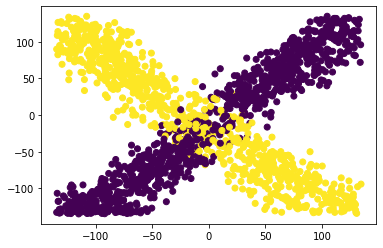

In [22]:
plt.scatter(X_train[:, 0], X_train[:, 1], c= Y_train)
plt.show()

##Logistic Regression

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
params_grid = [
               {"penalty" : ["l2"], "solver" : ["newton-cg", "lbfgs", "saga"], "tol" : [0.0001, 0.001, 0.005, 0.009, 0.01, 0.05, 0.09, 0.1, 0.5], "C" : [1, 5, 10, 20, 30, 50, 60, 80, 100], "max_iter" : [10, 50, 100, 500, 1000, 2000, 5000]},
               {"penalty" : ["l1"], "solver" : ["liblinear", "saga"], "tol" : [0.0001, 0.001, 0.005, 0.009, 0.01, 0.05, 0.09, 0.1, 0.5], "C" : [1, 5, 10, 20, 30, 50, 60, 80, 100], "max_iter" : [10, 50, 100, 500, 1000, 2000, 5000]},
               {"penalty" : ["elasticnet"], "solver" : ["saga"], "tol" : [0.0001, 0.001, 0.005, 0.009, 0.01, 0.05, 0.09, 0.1, 0.5], "C" : [1, 5, 10, 20, 30, 50, 60, 80, 100], "max_iter" : [10, 50, 100, 500, 1000, 2000, 5000]}


]
grid_search_log_reg = GridSearchCV(log_reg, params_grid, cv = 3, verbose = 3)
grid_search_log_reg.fit(X_train, Y_train)

Fitting 3 folds for each of 3402 candidates, totalling 10206 fits
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.0001 ......
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.0001, score=0.726, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.0001 ......
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.0001, score=0.733, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.0001 ......
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.0001, score=0.746, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 .......
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.726, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 .......
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.733, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 .......
[CV]  C=1, max_iter=10, penalty=l2, solver=ne

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations

[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09, score=0.726, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09 ........
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09, score=0.733, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09 ........
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09, score=0.746, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1 .........
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1, score=0.726, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1 .........
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1, score=0.733, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1 .........
[CV]  C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1, score=0.746, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=newton-cg, tol=0.5 .........
[CV]  C=1, max_iter=10, penalty

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.613, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05 ............
[CV]  C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.716, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05 ............
[CV]  C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.575, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09 ............
[CV]  C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09, score=0.613, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09 ............
[CV]  C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09, score=0.716, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09 ............
[CV]  C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09, score=0.575, total=   0.0s
[CV] C=1, max_iter=10, penalty=l2, solver=lbfgs, tol=0.1 .............
[CV]  C=1, max_iter=10, penalty=l2, solver=lbfgs, to

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001, score=0.726, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001 ......
[CV]  C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001, score=0.733, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001 ......
[CV]  C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001, score=0.746, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001 .......
[CV]  C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001, score=0.726, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001 .......
[CV]  C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001, score=0.733, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001 .......
[CV]  C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=newton-cg, tol=0.005 .......
[CV]  C=1, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=50, penalty=l2, solver=saga, tol=0.09, score=0.672, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=saga, tol=0.09 .............
[CV]  C=1, max_iter=50, penalty=l2, solver=saga, tol=0.09, score=0.658, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=saga, tol=0.1 ..............
[CV]  C=1, max_iter=50, penalty=l2, solver=saga, tol=0.1, score=0.601, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=saga, tol=0.1 ..............
[CV]  C=1, max_iter=50, penalty=l2, solver=saga, tol=0.1, score=0.646, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=saga, tol=0.1 ..............
[CV]  C=1, max_iter=50, penalty=l2, solver=saga, tol=0.1, score=0.670, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=saga, tol=0.5 ..............
[CV]  C=1, max_iter=50, penalty=l2, solver=saga, tol=0.5, score=0.543, total=   0.0s
[CV] C=1, max_iter=50, penalty=l2, solver=saga, tol=0.5 ..............
[CV]  C=1, max_iter=50, penalty=l2, solver=saga, tol=0.5, scor

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=100, penalty=l2, solver=saga, tol=0.005, score=0.719, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, tol=0.005, score=0.675, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga, tol=0.009 ...........
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, tol=0.009, score=0.658, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga, tol=0.009 ...........
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, tol=0.009, score=0.717, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga, tol=0.009 ...........
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, tol=0.009, score=0.670, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga, tol=0.01 ............
[CV]  C=1, max_iter=100, penalty=l2, solver=saga, tol=0.01, score=0.667, total=   0.0s
[CV] C=1, max_iter=100, penalty=l2, solver=saga, tol=0.01 ............
[CV]  C=1, max_iter=100, penalty=l2, solver=sag

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 .......
[CV]  C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.726, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 .......
[CV]  C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.733, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 .......
[CV]  C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.746, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 .......
[CV]  C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009, score=0.726, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 .......
[CV]  C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 .......
[CV]  C=5, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=5, max_iter=10, penalty=l2, solver=saga, tol=0.0001, score=0.668, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=saga, tol=0.001 ............
[CV]  C=5, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.648, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=saga, tol=0.001 ............
[CV]  C=5, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.699, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=saga, tol=0.001 ............
[CV]  C=5, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.670, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=saga, tol=0.005 ............
[CV]  C=5, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.655, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=saga, tol=0.005 ............
[CV]  C=5, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.699, total=   0.0s
[CV] C=5, max_iter=10, penalty=l2, solver=saga, tol=0.005 ............
[CV]  C=5, max_iter=10, penalty=l2, solver=saga, to

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.005, score=0.746, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 .......
[CV]  C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.726, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 .......
[CV]  C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 .......
[CV]  C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.746, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 ........
[CV]  C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.726, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 ........
[CV]  C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.733, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 ........
[CV]  C=5, max_iter=50, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=5, max_iter=50, penalty=l2, solver=saga, tol=0.0001 ...........
[CV]  C=5, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=saga, tol=0.0001 ...........
[CV]  C=5, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.734, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=saga, tol=0.001 ............
[CV]  C=5, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.731, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=saga, tol=0.001 ............
[CV]  C=5, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.729, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=saga, tol=0.001 ............
[CV]  C=5, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.728, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=saga, tol=0.005 ............
[CV]  C=5, max_iter=50, penalty=l2, solver=saga, tol=0.005, score=0.672, total=   0.0s
[CV] C=5, max_iter=50, penalty=l2, solver=saga, t

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5, max_iter=100, penalty=l2, solver=saga, tol=0.09, score=0.658, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=saga, tol=0.1 .............
[CV]  C=5, max_iter=100, penalty=l2, solver=saga, tol=0.1, score=0.616, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=saga, tol=0.1 .............
[CV]  C=5, max_iter=100, penalty=l2, solver=saga, tol=0.1, score=0.694, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=saga, tol=0.1 .............
[CV]  C=5, max_iter=100, penalty=l2, solver=saga, tol=0.1, score=0.655, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=5, max_iter=100, penalty=l2, solver=saga, tol=0.5, score=0.567, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=5, max_iter=100, penalty=l2, solver=saga, tol=0.5, score=0.653, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=5, max_iter=100, penalty=l2, solver=saga, tol=0.5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.726, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.733, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.746, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009, score=0.726, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=10, max_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=10, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.673, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=10, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.702, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=10, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.663, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=10, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.646, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=10, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.694, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=10, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.670, total=   0.0s
[CV] C=10, max_iter=10, penalty=l2, solver=saga, tol=0.009 ...........
[CV]  C=10, max_iter=10, penalty=l2, solver=sa

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.726, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.746, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.726, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.733, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.746, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=10, max_ite

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=saga, tol=0.0001 ..........
[CV]  C=10, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.734, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=10, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.729, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=10, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.717, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=10, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.682, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=10, max_iter=50, penalty=l2, solver=saga, tol=0.005, score=0.672, total=   0.0s
[CV] C=10, max_iter=50, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=10, max_iter=50, penalty=l2, solver=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=100, penalty=l2, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.741, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.736, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.702, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, tol=0.005, score=0.672, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, tol=0.005, score=0.719, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=10, max_iter=100, penalty=l2, s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.01, score=0.746, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05, score=0.726, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05, score=0.733, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05, score=0.746, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09 .......
[CV]  C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09, score=0.726, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09 .......
[CV]  C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09, score=0.733, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09 .......
[CV]  C=20, max_iter=1

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.01, score=0.613, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.01 ...........
[CV]  C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.01, score=0.716, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.01 ...........
[CV]  C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.01, score=0.575, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05 ...........
[CV]  C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.613, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05 ...........
[CV]  C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.716, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05 ...........
[CV]  C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.575, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09 ...........
[CV]  C=20, max_iter=10, penalty=l2, solver=lb

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=20, max_iter=10, penalty=l2, solver=saga, tol=0.5, score=0.587, total=   0.0s
[CV] C=20, max_iter=10, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=20, max_iter=10, penalty=l2, solver=saga, tol=0.5, score=0.635, total=   0.0s
[CV] C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001 .....
[CV]  C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001, score=0.726, total=   0.0s
[CV] C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001 .....
[CV]  C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001, score=0.733, total=   0.0s
[CV] C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001 .....
[CV]  C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001, score=0.746, total=   0.0s
[CV] C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001 ......
[CV]  C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001, score=0.726, total=   0.0s
[CV] C=20, max_iter=50, penalty=l2, solver=newton-cg, tol=0.001 ......
[CV]  C=20, max_iter=50, pe

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001, score=0.733, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001 ....
[CV]  C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.0001, score=0.746, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001 .....
[CV]  C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001, score=0.726, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001 .....
[CV]  C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001, score=0.733, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001 .....
[CV]  C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005 .....
[CV]  C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005, score=0.726, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005 .....
[CV]  C=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=20, max_iter=100, penalty=l2, solver=saga, tol=0.1, score=0.697, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=saga, tol=0.1 ............
[CV]  C=20, max_iter=100, penalty=l2, solver=saga, tol=0.1, score=0.660, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=saga, tol=0.5 ............
[CV]  C=20, max_iter=100, penalty=l2, solver=saga, tol=0.5, score=0.618, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=saga, tol=0.5 ............
[CV]  C=20, max_iter=100, penalty=l2, solver=saga, tol=0.5, score=0.668, total=   0.0s
[CV] C=20, max_iter=100, penalty=l2, solver=saga, tol=0.5 ............
[CV]  C=20, max_iter=100, penalty=l2, solver=saga, tol=0.5, score=0.499, total=   0.0s
[CV] C=20, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001 ....
[CV]  C=20, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001, score=0.726, total=   0.0s
[CV] C=20, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001 ....
[CV]  C=20, max_iter=500, penalty=l2, solver

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.0001, score=0.746, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 ......
[CV]  C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.726, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 ......
[CV]  C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.733, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 ......
[CV]  C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.726, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.733, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=30, max

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=30, max_iter=10, penalty=l2, solver=lbfgs, tol=0.1, score=0.575, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=lbfgs, tol=0.5 ............
[CV]  C=30, max_iter=10, penalty=l2, solver=lbfgs, tol=0.5, score=0.613, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=lbfgs, tol=0.5 ............
[CV]  C=30, max_iter=10, penalty=l2, solver=lbfgs, tol=0.5, score=0.716, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=lbfgs, tol=0.5 ............
[CV]  C=30, max_iter=10, penalty=l2, solver=lbfgs, tol=0.5, score=0.575, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=saga, tol=0.0001 ..........
[CV]  C=30, max_iter=10, penalty=l2, solver=saga, tol=0.0001, score=0.655, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=saga, tol=0.0001 ..........
[CV]  C=30, max_iter=10, penalty=l2, solver=saga, tol=0.0001, score=0.697, total=   0.0s
[CV] C=30, max_iter=10, penalty=l2, solver=saga, tol=0.0001 ..........
[CV]  C=30, max_iter=10, penalty=l2, solver=saga

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.005, score=0.733, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.005, score=0.746, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.726, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.746, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.726, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=30, max_i

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=30, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.729, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=saga, tol=0.0001 ..........
[CV]  C=30, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=saga, tol=0.0001 ..........
[CV]  C=30, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.734, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=30, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.704, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=30, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.734, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=30, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.699, total=   0.0s
[CV] C=30, max_iter=50, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=30, max_iter=50, penalty=l2, solver

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=30, max_iter=100, penalty=l2, solver=saga, tol=0.0001, score=0.751, total=   0.0s
[CV] C=30, max_iter=100, penalty=l2, solver=saga, tol=0.0001 .........
[CV]  C=30, max_iter=100, penalty=l2, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=30, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=30, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.729, total=   0.0s
[CV] C=30, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=30, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.748, total=   0.0s
[CV] C=30, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=30, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.714, total=   0.0s
[CV] C=30, max_iter=100, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=30, max_iter=100, penalty=l2, solver=saga, tol=0.005, score=0.672, total=   0.0s
[CV] C=30, max_iter=100, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=30, max_iter=100, penalty=l2, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009, score=0.746, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.01, score=0.726, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.01, score=0.733, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.01, score=0.746, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05, score=0.726, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=50, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.001, score=0.716, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.001 ..........
[CV]  C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.001, score=0.575, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.005 ..........
[CV]  C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.005, score=0.613, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.005 ..........
[CV]  C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.005, score=0.716, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.005 ..........
[CV]  C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.005, score=0.575, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.009 ..........
[CV]  C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.009, score=0.613, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=lbfgs, tol=0.009 ..........
[CV]  C=50, max_iter=10, penalty=l2, sol

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=50, max_iter=10, penalty=l2, solver=saga, tol=0.009, score=0.699, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=saga, tol=0.009 ...........
[CV]  C=50, max_iter=10, penalty=l2, solver=saga, tol=0.009, score=0.665, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=saga, tol=0.01 ............
[CV]  C=50, max_iter=10, penalty=l2, solver=saga, tol=0.01, score=0.657, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=saga, tol=0.01 ............
[CV]  C=50, max_iter=10, penalty=l2, solver=saga, tol=0.01, score=0.701, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=saga, tol=0.01 ............
[CV]  C=50, max_iter=10, penalty=l2, solver=saga, tol=0.01, score=0.660, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=saga, tol=0.05 ............
[CV]  C=50, max_iter=10, penalty=l2, solver=saga, tol=0.05, score=0.648, total=   0.0s
[CV] C=50, max_iter=10, penalty=l2, solver=saga, tol=0.05 ............
[CV]  C=50, max_iter=10, penalty=l2, solver=saga, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=50, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.734, total=   0.0s
[CV] C=50, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.723, total=   0.0s
[CV] C=50, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.748, total=   0.0s
[CV] C=50, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.707, total=   0.0s
[CV] C=50, max_iter=50, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=50, max_iter=50, penalty=l2, solver=saga, tol=0.005, score=0.658, total=   0.0s
[CV] C=50, max_iter=50, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=50, max_iter=50, penalty=l2, solver=saga, tol=0.005, score=0.719, total=   0.0s
[CV] C=50, max_iter=50, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=50, max_iter=50, penalty=l2, solver=s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=50, max_iter=100, penalty=l2, solver=saga, tol=0.0001, score=0.743, total=   0.0s
[CV] C=50, max_iter=100, penalty=l2, solver=saga, tol=0.0001 .........
[CV]  C=50, max_iter=100, penalty=l2, solver=saga, tol=0.0001, score=0.751, total=   0.0s
[CV] C=50, max_iter=100, penalty=l2, solver=saga, tol=0.0001 .........
[CV]  C=50, max_iter=100, penalty=l2, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=50, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=50, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.712, total=   0.0s
[CV] C=50, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=50, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.738, total=   0.0s
[CV] C=50, max_iter=100, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=50, max_iter=100, penalty=l2, solver=saga, tol=0.001, score=0.711, total=   0.0s
[CV] C=50, max_iter=100, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=50, max_iter=100, penalty=l2,

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05, score=0.733, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.05, score=0.746, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09 .......
[CV]  C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09, score=0.726, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09 .......
[CV]  C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09, score=0.733, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09 .......
[CV]  C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.09, score=0.746, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1 ........
[CV]  C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1, score=0.726, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=newton-cg, tol=0.1 ........
[CV]  C=60, max_iter=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.01, score=0.575, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05 ...........
[CV]  C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.613, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05 ...........
[CV]  C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.716, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05 ...........
[CV]  C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.05, score=0.575, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09 ...........
[CV]  C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09, score=0.613, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09 ...........
[CV]  C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09, score=0.716, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=lbfgs, tol=0.09 ...........
[CV]  C=60, max_iter=10, penalty=l2, solver=lb

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=60, max_iter=10, penalty=l2, solver=saga, tol=0.1, score=0.719, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=saga, tol=0.1 .............
[CV]  C=60, max_iter=10, penalty=l2, solver=saga, tol=0.1, score=0.658, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=60, max_iter=10, penalty=l2, solver=saga, tol=0.5, score=0.660, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=60, max_iter=10, penalty=l2, solver=saga, tol=0.5, score=0.684, total=   0.0s
[CV] C=60, max_iter=10, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=60, max_iter=10, penalty=l2, solver=saga, tol=0.5, score=0.619, total=   0.0s
[CV] C=60, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001 .....
[CV]  C=60, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001, score=0.726, total=   0.0s
[CV] C=60, max_iter=50, penalty=l2, solver=newton-cg, tol=0.0001 .....
[CV]  C=60, max_iter=50, penalty=l2, solver=newton

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=60, max_iter=50, penalty=l2, solver=saga, tol=0.09, score=0.648, total=   0.0s
[CV] C=60, max_iter=50, penalty=l2, solver=saga, tol=0.1 .............
[CV]  C=60, max_iter=50, penalty=l2, solver=saga, tol=0.1, score=0.640, total=   0.0s
[CV] C=60, max_iter=50, penalty=l2, solver=saga, tol=0.1 .............
[CV]  C=60, max_iter=50, penalty=l2, solver=saga, tol=0.1, score=0.638, total=   0.0s
[CV] C=60, max_iter=50, penalty=l2, solver=saga, tol=0.1 .............
[CV]  C=60, max_iter=50, penalty=l2, solver=saga, tol=0.1, score=0.658, total=   0.0s
[CV] C=60, max_iter=50, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=60, max_iter=50, penalty=l2, solver=saga, tol=0.5, score=0.640, total=   0.0s
[CV] C=60, max_iter=50, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=60, max_iter=50, penalty=l2, solver=saga, tol=0.5, score=0.670, total=   0.0s
[CV] C=60, max_iter=50, penalty=l2, solver=saga, tol=0.5 .............
[CV]  C=60, max_iter=50, penalty=l2, solver=saga, tol=0.5

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=60, max_iter=100, penalty=l2, solver=saga, tol=0.05, score=0.646, total=   0.0s
[CV] C=60, max_iter=100, penalty=l2, solver=saga, tol=0.05 ...........
[CV]  C=60, max_iter=100, penalty=l2, solver=saga, tol=0.05, score=0.706, total=   0.0s
[CV] C=60, max_iter=100, penalty=l2, solver=saga, tol=0.05 ...........
[CV]  C=60, max_iter=100, penalty=l2, solver=saga, tol=0.05, score=0.660, total=   0.0s
[CV] C=60, max_iter=100, penalty=l2, solver=saga, tol=0.09 ...........
[CV]  C=60, max_iter=100, penalty=l2, solver=saga, tol=0.09, score=0.636, total=   0.0s
[CV] C=60, max_iter=100, penalty=l2, solver=saga, tol=0.09 ...........
[CV]  C=60, max_iter=100, penalty=l2, solver=saga, tol=0.09, score=0.701, total=   0.0s
[CV] C=60, max_iter=100, penalty=l2, solver=saga, tol=0.09 ...........
[CV]  C=60, max_iter=100, penalty=l2, solver=saga, tol=0.09, score=0.616, total=   0.0s
[CV] C=60, max_iter=100, penalty=l2, solver=saga, tol=0.1 ............
[CV]  C=60, max_iter=100, penalty=l2, solver=s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.726, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 ......
[CV]  C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.733, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 ......
[CV]  C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.726, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.733, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 ......
[CV]  C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.746, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=80, max_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=80, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.692, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=80, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.651, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=80, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.662, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=80, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.694, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=80, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.662, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=saga, tol=0.009 ...........
[CV]  C=80, max_iter=10, penalty=l2, solver=saga, tol=0.009, score=0.665, total=   0.0s
[CV] C=80, max_iter=10, penalty=l2, solver=saga, tol=0.009 ...........
[CV]  C=80, max_iter=10, penalty=l2, solver=sa

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 ......
[CV]  C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.746, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.726, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.733, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 .......
[CV]  C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.746, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.05, score=0.726, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=newton-cg, tol=0.05 .......
[CV]  C=80, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=80, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=saga, tol=0.0001 ..........
[CV]  C=80, max_iter=50, penalty=l2, solver=saga, tol=0.0001, score=0.734, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=80, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.714, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=80, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.748, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=saga, tol=0.001 ...........
[CV]  C=80, max_iter=50, penalty=l2, solver=saga, tol=0.001, score=0.731, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=80, max_iter=50, penalty=l2, solver=saga, tol=0.005, score=0.672, total=   0.0s
[CV] C=80, max_iter=50, penalty=l2, solver=saga, tol=0.005 ...........
[CV]  C=80, max_iter=50, penalty=l2, solver=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001, score=0.733, total=   0.0s
[CV] C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001 ....
[CV]  C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001, score=0.746, total=   0.0s
[CV] C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001 .....
[CV]  C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001, score=0.726, total=   0.0s
[CV] C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001 .....
[CV]  C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001, score=0.733, total=   0.0s
[CV] C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001 .....
[CV]  C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.005 .....
[CV]  C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.005, score=0.726, total=   0.0s
[CV] C=80, max_iter=500, penalty=l2, solver=newton-cg, tol=0.005 .....
[CV]  C=

/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:212: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", Convergenc

[CV]  C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.733, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001 .....
[CV]  C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 .....
[CV]  C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.726, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 .....
[CV]  C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.733, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005 .....
[CV]  C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.005, score=0.746, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 .....
[CV]  C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009, score=0.726, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=newton-cg, tol=0.009 .....
[CV]  C=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[CV]  C=100, max_iter=10, penalty=l2, solver=saga, tol=0.0001, score=0.667, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=100, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.658, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=100, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.695, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=saga, tol=0.001 ..........
[CV]  C=100, max_iter=10, penalty=l2, solver=saga, tol=0.001, score=0.662, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=100, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.663, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=100, max_iter=10, penalty=l2, solver=saga, tol=0.005, score=0.687, total=   0.0s
[CV] C=100, max_iter=10, penalty=l2, solver=saga, tol=0.005 ..........
[CV]  C=100, max_iter=10, penalty=l2, s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 


[CV]  C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.726, total=   0.0s
[CV] C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 .....
[CV]  C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009 .....
[CV]  C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.009, score=0.746, total=   0.0s
[CV] C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 ......
[CV]  C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.726, total=   0.0s
[CV] C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 ......
[CV]  C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.733, total=   0.0s
[CV] C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01 ......
[CV]  C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.01, score=0.746, total=   0.0s
[CV] C=100, max_iter=50, penalty=l2, solver=newton-cg, tol=0.05 ......
[CV]  C=100,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.001, score=0.746, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005 ....
[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005, score=0.726, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005 ....
[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005, score=0.733, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005 ....
[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.005, score=0.746, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.009 ....
[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.009, score=0.726, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.009 ....
[CV]  C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.009, score=0.733, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=newton-cg, tol=0.009 ....
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=100, penalty=l2, solver=saga, tol=0.1, score=0.648, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga, tol=0.1 ...........
[CV]  C=100, max_iter=100, penalty=l2, solver=saga, tol=0.1, score=0.653, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga, tol=0.5 ...........
[CV]  C=100, max_iter=100, penalty=l2, solver=saga, tol=0.5, score=0.538, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga, tol=0.5 ...........
[CV]  C=100, max_iter=100, penalty=l2, solver=saga, tol=0.5, score=0.607, total=   0.0s
[CV] C=100, max_iter=100, penalty=l2, solver=saga, tol=0.5 ...........
[CV]  C=100, max_iter=100, penalty=l2, solver=saga, tol=0.5, score=0.525, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001 ...
[CV]  C=100, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001, score=0.726, total=   0.0s
[CV] C=100, max_iter=500, penalty=l2, solver=newton-cg, tol=0.0001 ...
[CV]  C=100, max_iter=500, penalty=l2,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.009, score=0.733, total=   0.0s
[CV] C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.009 .......
[CV]  C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.009, score=0.746, total=   0.0s
[CV] C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.01 ........
[CV]  C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.01, score=0.728, total=   0.0s
[CV] C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.01 ........
[CV]  C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.01, score=0.733, total=   0.0s
[CV] C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.01 ........
[CV]  C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.01, score=0.745, total=   0.0s
[CV] C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.05 ........
[CV]  C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.05, score=0.728, total=   0.0s
[CV] C=1, max_iter=50, penalty=l1, solver=liblinear, tol=0.05 ........
[CV]  C=1, max_iter=50, pe

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=50, penalty=l1, solver=saga, tol=0.5, score=0.694, total=   0.0s
[CV] C=1, max_iter=50, penalty=l1, solver=saga, tol=0.5 ..............
[CV]  C=1, max_iter=50, penalty=l1, solver=saga, tol=0.5, score=0.653, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001 .....
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001, score=0.728, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001 .....
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001, score=0.733, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001 .....
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001, score=0.745, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.001 ......
[CV]  C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.001, score=0.728, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=liblinear, tol=0.001 ......
[CV]  C=1, max_iter=100, pena

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, max_iter=100, penalty=l1, solver=saga, tol=0.01, score=0.707, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, tol=0.01, score=0.660, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, tol=0.05, score=0.657, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, tol=0.05, score=0.689, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, tol=0.05, score=0.650, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, tol=0.09, score=0.641, total=   0.0s
[CV] C=1, max_iter=100, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=1, max_iter=100, penalty=l1, solver=saga, to

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=5, max_iter=10, penalty=l1, solver=saga, tol=0.009, score=0.663, total=   0.0s
[CV] C=5, max_iter=10, penalty=l1, solver=saga, tol=0.01 .............
[CV]  C=5, max_iter=10, penalty=l1, solver=saga, tol=0.01, score=0.655, total=   0.0s
[CV] C=5, max_iter=10, penalty=l1, solver=saga, tol=0.01 .............
[CV]  C=5, max_iter=10, penalty=l1, solver=saga, tol=0.01, score=0.701, total=   0.0s
[CV] C=5, max_iter=10, penalty=l1, solver=saga, tol=0.01 .............
[CV]  C=5, max_iter=10, penalty=l1, solver=saga, tol=0.01, score=0.665, total=   0.0s
[CV] C=5, max_iter=10, penalty=l1, solver=saga, tol=0.05 .............
[CV]  C=5, max_iter=10, penalty=l1, solver=saga, tol=0.05, score=0.651, total=   0.0s
[CV] C=5, max_iter=10, penalty=l1, solver=saga, tol=0.05 .............
[CV]  C=5, max_iter=10, penalty=l1, solver=saga, tol=0.05, score=0.699, total=   0.0s
[CV] C=5, max_iter=10, penalty=l1, solver=saga, tol=0.05 .............
[CV]  C=5, max_iter=10, penalty=l1, solver=saga, tol=0.05

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5, max_iter=50, penalty=l1, solver=saga, tol=0.005, score=0.672, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1, solver=saga, tol=0.005 ............
[CV]  C=5, max_iter=50, penalty=l1, solver=saga, tol=0.005, score=0.709, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1, solver=saga, tol=0.005 ............
[CV]  C=5, max_iter=50, penalty=l1, solver=saga, tol=0.005, score=0.680, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1, solver=saga, tol=0.009 ............
[CV]  C=5, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.672, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1, solver=saga, tol=0.009 ............
[CV]  C=5, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.711, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1, solver=saga, tol=0.009 ............
[CV]  C=5, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.668, total=   0.0s
[CV] C=5, max_iter=50, penalty=l1, solver=saga, tol=0.01 .............
[CV]  C=5, max_iter=50, penalty=l1, solver=saga, tol

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5, max_iter=100, penalty=l1, solver=saga, tol=0.0001, score=0.751, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=saga, tol=0.0001 ..........
[CV]  C=5, max_iter=100, penalty=l1, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=5, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.707, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=5, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.736, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=5, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.723, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=5, max_iter=100, penalty=l1, solver=saga, tol=0.005, score=0.690, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=5, max_iter=100, penalty=l1, solver=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=10, max_iter=10, penalty=l1, solver=saga, tol=0.01, score=0.665, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=10, max_iter=10, penalty=l1, solver=saga, tol=0.05, score=0.663, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=10, max_iter=10, penalty=l1, solver=saga, tol=0.05, score=0.711, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=10, max_iter=10, penalty=l1, solver=saga, tol=0.05, score=0.665, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=10, max_iter=10, penalty=l1, solver=saga, tol=0.09, score=0.643, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=10, max_iter=10, penalty=l1, solver=saga, tol=0.09, score=0.662, total=   0.0s
[CV] C=10, max_iter=10, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=10, max_iter=10, penalty=l1, solver=saga, to

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=10, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.667, total=   0.0s
[CV] C=10, max_iter=50, penalty=l1, solver=saga, tol=0.009 ...........
[CV]  C=10, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.717, total=   0.0s
[CV] C=10, max_iter=50, penalty=l1, solver=saga, tol=0.009 ...........
[CV]  C=10, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.663, total=   0.0s
[CV] C=10, max_iter=50, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=10, max_iter=50, penalty=l1, solver=saga, tol=0.01, score=0.672, total=   0.0s
[CV] C=10, max_iter=50, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=10, max_iter=50, penalty=l1, solver=saga, tol=0.01, score=0.717, total=   0.0s
[CV] C=10, max_iter=50, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=10, max_iter=50, penalty=l1, solver=saga, tol=0.01, score=0.667, total=   0.0s
[CV] C=10, max_iter=50, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=10, max_iter=50, penalty=l1, solver=saga,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.739, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga, tol=0.001 ..........
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.729, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga, tol=0.001 ..........
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.711, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga, tol=0.005 ..........
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, tol=0.005, score=0.670, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga, tol=0.005 ..........
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, tol=0.005, score=0.717, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga, tol=0.005 ..........
[CV]  C=10, max_iter=100, penalty=l1, solver=saga, tol=0.005, score=0.662, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=saga, tol=0.009 ..........
[CV]  C=10, max_iter=100, penalty=l1, so

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=20, max_iter=10, penalty=l1, solver=saga, tol=0.0001, score=0.663, total=   0.0s
[CV] C=20, max_iter=10, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=20, max_iter=10, penalty=l1, solver=saga, tol=0.001, score=0.670, total=   0.0s
[CV] C=20, max_iter=10, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=20, max_iter=10, penalty=l1, solver=saga, tol=0.001, score=0.701, total=   0.0s
[CV] C=20, max_iter=10, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=20, max_iter=10, penalty=l1, solver=saga, tol=0.001, score=0.668, total=   0.0s
[CV] C=20, max_iter=10, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=20, max_iter=10, penalty=l1, solver=saga, tol=0.005, score=0.668, total=   0.0s
[CV] C=20, max_iter=10, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=20, max_iter=10, penalty=l1, solver=saga, tol=0.005, score=0.709, total=   0.0s
[CV] C=20, max_iter=10, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=20, max_iter=10, penalty=l1, solver=s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=20, max_iter=50, penalty=l1, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=20, max_iter=50, penalty=l1, solver=saga, tol=0.0001 ..........
[CV]  C=20, max_iter=50, penalty=l1, solver=saga, tol=0.0001, score=0.734, total=   0.0s
[CV] C=20, max_iter=50, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=20, max_iter=50, penalty=l1, solver=saga, tol=0.001, score=0.729, total=   0.0s
[CV] C=20, max_iter=50, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=20, max_iter=50, penalty=l1, solver=saga, tol=0.001, score=0.750, total=   0.0s
[CV] C=20, max_iter=50, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=20, max_iter=50, penalty=l1, solver=saga, tol=0.001, score=0.717, total=   0.0s
[CV] C=20, max_iter=50, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=20, max_iter=50, penalty=l1, solver=saga, tol=0.005, score=0.667, total=   0.0s
[CV] C=20, max_iter=50, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=20, max_iter=50, penalty=l1, solver=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.001, score=0.733, total=   0.0s
[CV] C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.001 .....
[CV]  C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.001, score=0.746, total=   0.0s
[CV] C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.005 .....
[CV]  C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.005, score=0.726, total=   0.0s
[CV] C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.005 .....
[CV]  C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.005, score=0.733, total=   0.0s
[CV] C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.005 .....
[CV]  C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.005, score=0.746, total=   0.0s
[CV] C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.009 .....
[CV]  C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.009, score=0.726, total=   0.0s
[CV] C=20, max_iter=500, penalty=l1, solver=liblinear, tol=0.009 .....
[CV]  C=20

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=30, max_iter=10, penalty=l1, solver=saga, tol=0.1, score=0.638, total=   0.0s
[CV] C=30, max_iter=10, penalty=l1, solver=saga, tol=0.1 .............
[CV]  C=30, max_iter=10, penalty=l1, solver=saga, tol=0.1, score=0.645, total=   0.0s
[CV] C=30, max_iter=10, penalty=l1, solver=saga, tol=0.5 .............
[CV]  C=30, max_iter=10, penalty=l1, solver=saga, tol=0.5, score=0.673, total=   0.0s
[CV] C=30, max_iter=10, penalty=l1, solver=saga, tol=0.5 .............
[CV]  C=30, max_iter=10, penalty=l1, solver=saga, tol=0.5, score=0.540, total=   0.0s
[CV] C=30, max_iter=10, penalty=l1, solver=saga, tol=0.5 .............
[CV]  C=30, max_iter=10, penalty=l1, solver=saga, tol=0.5, score=0.685, total=   0.0s
[CV] C=30, max_iter=50, penalty=l1, solver=liblinear, tol=0.0001 .....
[CV]  C=30, max_iter=50, penalty=l1, solver=liblinear, tol=0.0001, score=0.726, total=   0.0s
[CV] C=30, max_iter=50, penalty=l1, solver=liblinear, tol=0.0001 .....
[CV]  C=30, max_iter=50, penalty=l1, solver=liblin

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=30, max_iter=50, penalty=l1, solver=saga, tol=0.05, score=0.663, total=   0.0s
[CV] C=30, max_iter=50, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=30, max_iter=50, penalty=l1, solver=saga, tol=0.09, score=0.646, total=   0.0s
[CV] C=30, max_iter=50, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=30, max_iter=50, penalty=l1, solver=saga, tol=0.09, score=0.690, total=   0.0s
[CV] C=30, max_iter=50, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=30, max_iter=50, penalty=l1, solver=saga, tol=0.09, score=0.655, total=   0.0s
[CV] C=30, max_iter=50, penalty=l1, solver=saga, tol=0.1 .............
[CV]  C=30, max_iter=50, penalty=l1, solver=saga, tol=0.1, score=0.679, total=   0.0s
[CV] C=30, max_iter=50, penalty=l1, solver=saga, tol=0.1 .............
[CV]  C=30, max_iter=50, penalty=l1, solver=saga, tol=0.1, score=0.692, total=   0.0s
[CV] C=30, max_iter=50, penalty=l1, solver=saga, tol=0.1 .............
[CV]  C=30, max_iter=50, penalty=l1, solver=saga, tol=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=30, max_iter=100, penalty=l1, solver=saga, tol=0.005 ..........
[CV]  C=30, max_iter=100, penalty=l1, solver=saga, tol=0.005, score=0.728, total=   0.0s
[CV] C=30, max_iter=100, penalty=l1, solver=saga, tol=0.005 ..........
[CV]  C=30, max_iter=100, penalty=l1, solver=saga, tol=0.005, score=0.679, total=   0.0s
[CV] C=30, max_iter=100, penalty=l1, solver=saga, tol=0.009 ..........
[CV]  C=30, max_iter=100, penalty=l1, solver=saga, tol=0.009, score=0.672, total=   0.0s
[CV] C=30, max_iter=100, penalty=l1, solver=saga, tol=0.009 ..........
[CV]  C=30, max_iter=100, penalty=l1, solver=saga, tol=0.009, score=0.709, total=   0.0s
[CV] C=30, max_iter=100, penalty=l1, solver=saga, tol=0.009 ..........
[CV]  C=30, max_iter=100, penalty=l1, solver=saga, tol=0.009, score=0.658, total=   0.0s
[CV] C=30, max_iter=100, penalty=l1, solver=saga, tol=0.01 ...........
[CV]  C=30, max_iter=100, penalty=l1, solver=saga, tol=0.01, score=0.667, total=   0.0s
[CV] C=30, max_iter=100, penalty=l1, sol

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=50, max_iter=10, penalty=l1, solver=saga, tol=0.0001, score=0.665, total=   0.0s
[CV] C=50, max_iter=10, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=10, penalty=l1, solver=saga, tol=0.001, score=0.655, total=   0.0s
[CV] C=50, max_iter=10, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=10, penalty=l1, solver=saga, tol=0.001, score=0.706, total=   0.0s
[CV] C=50, max_iter=10, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=10, penalty=l1, solver=saga, tol=0.001, score=0.670, total=   0.0s
[CV] C=50, max_iter=10, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=50, max_iter=10, penalty=l1, solver=saga, tol=0.005, score=0.648, total=   0.0s
[CV] C=50, max_iter=10, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=50, max_iter=10, penalty=l1, solver=saga, tol=0.005, score=0.667, total=   0.0s
[CV] C=50, max_iter=10, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=50, max_iter=10, penalty=l1, solver=s

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=50, max_iter=50, penalty=l1, solver=saga, tol=0.0001, score=0.729, total=   0.0s
[CV] C=50, max_iter=50, penalty=l1, solver=saga, tol=0.0001 ..........
[CV]  C=50, max_iter=50, penalty=l1, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=50, max_iter=50, penalty=l1, solver=saga, tol=0.0001 ..........
[CV]  C=50, max_iter=50, penalty=l1, solver=saga, tol=0.0001, score=0.734, total=   0.0s
[CV] C=50, max_iter=50, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=50, penalty=l1, solver=saga, tol=0.001, score=0.692, total=   0.0s
[CV] C=50, max_iter=50, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=50, penalty=l1, solver=saga, tol=0.001, score=0.746, total=   0.0s
[CV] C=50, max_iter=50, penalty=l1, solver=saga, tol=0.001 ...........
[CV]  C=50, max_iter=50, penalty=l1, solver=saga, tol=0.001, score=0.706, total=   0.0s
[CV] C=50, max_iter=50, penalty=l1, solver=saga, tol=0.005 ...........
[CV]  C=50, max_iter=50, penalty=l1, solver

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=50, max_iter=100, penalty=l1, solver=saga, tol=0.0001, score=0.743, total=   0.0s
[CV] C=50, max_iter=100, penalty=l1, solver=saga, tol=0.0001 .........
[CV]  C=50, max_iter=100, penalty=l1, solver=saga, tol=0.0001, score=0.751, total=   0.0s
[CV] C=50, max_iter=100, penalty=l1, solver=saga, tol=0.0001 .........
[CV]  C=50, max_iter=100, penalty=l1, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=50, max_iter=100, penalty=l1, solver=saga, tol=0.001 ..........
[CV]  C=50, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.714, total=   0.0s
[CV] C=50, max_iter=100, penalty=l1, solver=saga, tol=0.001 ..........
[CV]  C=50, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.755, total=   0.0s
[CV] C=50, max_iter=100, penalty=l1, solver=saga, tol=0.001 ..........
[CV]  C=50, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.716, total=   0.0s
[CV] C=50, max_iter=100, penalty=l1, solver=saga, tol=0.005 ..........
[CV]  C=50, max_iter=100, penalty=l1,

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.009, score=0.745, total=   0.0s
[CV] C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.01 .......
[CV]  C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.01, score=0.724, total=   0.0s
[CV] C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.01 .......
[CV]  C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.01, score=0.733, total=   0.0s
[CV] C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.01 .......
[CV]  C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.01, score=0.746, total=   0.0s
[CV] C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.05 .......
[CV]  C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.05, score=0.724, total=   0.0s
[CV] C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.05 .......
[CV]  C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.05, score=0.733, total=   0.0s
[CV] C=60, max_iter=50, penalty=l1, solver=liblinear, tol=0.05 .......
[CV]  C=60, max_iter=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001, score=0.733, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001 ....
[CV]  C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001, score=0.746, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.001 .....
[CV]  C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.001, score=0.726, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.001 .....
[CV]  C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.001, score=0.733, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.001 .....
[CV]  C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.001, score=0.746, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.005 .....
[CV]  C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.005, score=0.726, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=liblinear, tol=0.005 .....
[CV]  C=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=60, max_iter=100, penalty=l1, solver=saga, tol=0.05, score=0.709, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=saga, tol=0.05 ...........
[CV]  C=60, max_iter=100, penalty=l1, solver=saga, tol=0.05, score=0.660, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=saga, tol=0.09 ...........
[CV]  C=60, max_iter=100, penalty=l1, solver=saga, tol=0.09, score=0.668, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=saga, tol=0.09 ...........
[CV]  C=60, max_iter=100, penalty=l1, solver=saga, tol=0.09, score=0.709, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=saga, tol=0.09 ...........
[CV]  C=60, max_iter=100, penalty=l1, solver=saga, tol=0.09, score=0.662, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=saga, tol=0.1 ............
[CV]  C=60, max_iter=100, penalty=l1, solver=saga, tol=0.1, score=0.645, total=   0.0s
[CV] C=60, max_iter=100, penalty=l1, solver=saga, tol=0.1 ............
[CV]  C=60, max_iter=100, penalty=l1, solver=sa

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=80, max_iter=10, penalty=l1, solver=saga, tol=0.01, score=0.663, total=   0.0s
[CV] C=80, max_iter=10, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=80, max_iter=10, penalty=l1, solver=saga, tol=0.01, score=0.701, total=   0.0s
[CV] C=80, max_iter=10, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=80, max_iter=10, penalty=l1, solver=saga, tol=0.01, score=0.651, total=   0.0s
[CV] C=80, max_iter=10, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=80, max_iter=10, penalty=l1, solver=saga, tol=0.05, score=0.694, total=   0.0s
[CV] C=80, max_iter=10, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=80, max_iter=10, penalty=l1, solver=saga, tol=0.05, score=0.712, total=   0.0s
[CV] C=80, max_iter=10, penalty=l1, solver=saga, tol=0.05 ............
[CV]  C=80, max_iter=10, penalty=l1, solver=saga, tol=0.05, score=0.667, total=   0.0s
[CV] C=80, max_iter=10, penalty=l1, solver=saga, tol=0.09 ............
[CV]  C=80, max_iter=10, penalty=l1, solver=saga, to

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=80, max_iter=50, penalty=l1, solver=saga, tol=0.005, score=0.675, total=   0.0s
[CV] C=80, max_iter=50, penalty=l1, solver=saga, tol=0.009 ...........
[CV]  C=80, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.667, total=   0.0s
[CV] C=80, max_iter=50, penalty=l1, solver=saga, tol=0.009 ...........
[CV]  C=80, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.701, total=   0.0s
[CV] C=80, max_iter=50, penalty=l1, solver=saga, tol=0.009 ...........
[CV]  C=80, max_iter=50, penalty=l1, solver=saga, tol=0.009, score=0.665, total=   0.0s
[CV] C=80, max_iter=50, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=80, max_iter=50, penalty=l1, solver=saga, tol=0.01, score=0.667, total=   0.0s
[CV] C=80, max_iter=50, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=80, max_iter=50, penalty=l1, solver=saga, tol=0.01, score=0.717, total=   0.0s
[CV] C=80, max_iter=50, penalty=l1, solver=saga, tol=0.01 ............
[CV]  C=80, max_iter=50, penalty=l1, solver=saga

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=80, max_iter=100, penalty=l1, solver=saga, tol=0.0001, score=0.751, total=   0.0s
[CV] C=80, max_iter=100, penalty=l1, solver=saga, tol=0.0001 .........
[CV]  C=80, max_iter=100, penalty=l1, solver=saga, tol=0.0001, score=0.748, total=   0.0s
[CV] C=80, max_iter=100, penalty=l1, solver=saga, tol=0.001 ..........
[CV]  C=80, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.672, total=   0.0s
[CV] C=80, max_iter=100, penalty=l1, solver=saga, tol=0.001 ..........
[CV]  C=80, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.755, total=   0.0s
[CV] C=80, max_iter=100, penalty=l1, solver=saga, tol=0.001 ..........
[CV]  C=80, max_iter=100, penalty=l1, solver=saga, tol=0.001, score=0.746, total=   0.0s
[CV] C=80, max_iter=100, penalty=l1, solver=saga, tol=0.005 ..........
[CV]  C=80, max_iter=100, penalty=l1, solver=saga, tol=0.005, score=0.665, total=   0.0s
[CV] C=80, max_iter=100, penalty=l1, solver=saga, tol=0.005 ..........
[CV]  C=80, max_iter=100, penalty=l1, 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

[CV]  C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.005, score=0.726, total=   0.0s
[CV] C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.005 .....
[CV]  C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.005, score=0.733, total=   0.0s
[CV] C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.005 .....
[CV]  C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.005, score=0.746, total=   0.0s
[CV] C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.009 .....
[CV]  C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.009, score=0.726, total=   0.0s
[CV] C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.009 .....
[CV]  C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.009, score=0.733, total=   0.0s
[CV] C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.009 .....
[CV]  C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.009, score=0.746, total=   0.0s
[CV] C=100, max_iter=50, penalty=l1, solver=liblinear, tol=0.01 ......
[CV]  C=10

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001, score=0.733, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001 ...
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001, score=0.746, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.001 ....
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.001, score=0.726, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.001 ....
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.001, score=0.733, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.001 ....
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.001, score=0.746, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.005 ....
[CV]  C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.005, score=0.724, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=liblinear, tol=0.005 ....
[C

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, max_iter=100, penalty=l1, solver=saga, tol=0.09, score=0.689, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga, tol=0.09 ..........
[CV]  C=100, max_iter=100, penalty=l1, solver=saga, tol=0.09, score=0.657, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga, tol=0.1 ...........
[CV]  C=100, max_iter=100, penalty=l1, solver=saga, tol=0.1, score=0.611, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga, tol=0.1 ...........
[CV]  C=100, max_iter=100, penalty=l1, solver=saga, tol=0.1, score=0.704, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga, tol=0.1 ...........
[CV]  C=100, max_iter=100, penalty=l1, solver=saga, tol=0.1, score=0.653, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga, tol=0.5 ...........
[CV]  C=100, max_iter=100, penalty=l1, solver=saga, tol=0.5, score=0.613, total=   0.0s
[CV] C=100, max_iter=100, penalty=l1, solver=saga, tol=0.5 ...........
[CV]  C=100, max_iter=100, penalty=l1, solve

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  FitFailedWarning)


[CV]  C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01 ....
[CV]  C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01 ....
[CV]  C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.01, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.05 ....
[CV]  C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.05, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.05 ....
[CV]  C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.05, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.05 ....
[CV]  C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.05, score=nan, total=   0.0s
[CV] C=1, max_iter=100, penalty=elasticnet, solver=saga, tol=0.09 ....
[CV]  C=1, max_i

[Parallel(n_jobs=1)]: Done 10206 out of 10206 | elapsed:  1.0min finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 20, 30, 50, 60, 80, 1...
                          'penalty': ['l1'], 'solver': ['liblinear', 'saga'],
                          'tol': [0.0001, 0.001, 0.005, 0.009, 0.01, 0.05, 0.09,
                                  0.1, 0.5]},
                         {'C': [1, 5, 10, 20, 30, 50, 60, 80, 100],
            

In [24]:
grid_search_log_reg.best_score_

0.7478849407783419

In [25]:
grid_search_log_reg.best_params_

{'C': 60, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.0001}

In [26]:
best_log_reg = grid_search_log_reg.best_estimator_
Y_pred = best_log_reg.predict(X_test)

In [27]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1_log_reg = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy  {accuracy}\nPrecision  {precision}\nRecall  {recall}\nF1_Score  {f1_log_reg}")

Accuracy  0.7477477477477478
Precision  0.9882352941176471
Recall  0.4307692307692308
F1_Score  0.6000000000000001


In [28]:
print(conf_matrix)

[[248   1]
 [111  84]]


##Linear SVM

In [29]:
from sklearn.svm import LinearSVC
svm_linear = LinearSVC()
params_grid = [
               {"tol" : [1e-4, 1e-3], "C" : [1, 5, 10, 20, 50, 100], "max_iter" : [100, 250, 500, 1000, 2000]}
]
grid_search_linear_svm = GridSearchCV(svm_linear, params_grid, cv = 3, verbose = 3)
grid_search_linear_svm.fit(X_train, Y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
[CV] C=1, max_iter=100, tol=0.0001 ...................................
[CV] ....... C=1, max_iter=100, tol=0.0001, score=0.547, total=   0.0s
[CV] C=1, max_iter=100, tol=0.0001 ...................................
[CV] ....... C=1, max_iter=100, tol=0.0001, score=0.475, total=   0.0s
[CV] C=1, max_iter=100, tol=0.0001 ...................................
[CV] ....... C=1, max_iter=100, tol=0.0001, score=0.531, total=   0.0s
[CV] C=1, max_iter=100, tol=0.001 ....................................
[CV] ........ C=1, max_iter=100, tol=0.001, score=0.491, total=   0.0s
[CV] C=1, max_iter=100, tol=0.001 ....................................
[CV] ........ C=1, max_iter=100, tol=0.001, score=0.582, total=   0.0s
[CV] C=1, max_iter=100, tol=0.001 ....................................
[CV] ........ C=1, max_iter=100, tol=0.001, score=0.550, total=   0.0s
[CV] C=1, max_iter=250, tol=0.0001 ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the

[CV] ....... C=1, max_iter=500, tol=0.0001, score=0.543, total=   0.0s
[CV] C=1, max_iter=500, tol=0.0001 ...................................
[CV] ....... C=1, max_iter=500, tol=0.0001, score=0.541, total=   0.0s
[CV] C=1, max_iter=500, tol=0.0001 ...................................
[CV] ....... C=1, max_iter=500, tol=0.0001, score=0.472, total=   0.0s
[CV] C=1, max_iter=500, tol=0.001 ....................................
[CV] ........ C=1, max_iter=500, tol=0.001, score=0.535, total=   0.0s
[CV] C=1, max_iter=500, tol=0.001 ....................................
[CV] ........ C=1, max_iter=500, tol=0.001, score=0.479, total=   0.0s
[CV] C=1, max_iter=500, tol=0.001 ....................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ........ C=1, max_iter=500, tol=0.001, score=0.533, total=   0.0s
[CV] C=1, max_iter=1000, tol=0.0001 ..................................
[CV] ...... C=1, max_iter=1000, tol=0.0001, score=0.540, total=   0.1s
[CV] C=1, max_iter=1000, tol=0.0001 ..................................
[CV] ...... C=1, max_iter=1000, tol=0.0001, score=0.523, total=   0.1s
[CV] C=1, max_iter=1000, tol=0.0001 ..................................
[CV] ...... C=1, max_iter=1000, tol=0.0001, score=0.557, total=   0.1s
[CV] C=1, max_iter=1000, tol=0.001 ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ....... C=1, max_iter=1000, tol=0.001, score=0.381, total=   0.1s
[CV] C=1, max_iter=1000, tol=0.001 ...................................
[CV] ....... C=1, max_iter=1000, tol=0.001, score=0.487, total=   0.1s
[CV] C=1, max_iter=1000, tol=0.001 ...................................
[CV] ....... C=1, max_iter=1000, tol=0.001, score=0.530, total=   0.1s
[CV] C=1, max_iter=2000, tol=0.0001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1, max_iter=2000, tol=0.0001, score=0.465, total=   0.1s
[CV] C=1, max_iter=2000, tol=0.0001 ..................................
[CV] ...... C=1, max_iter=2000, tol=0.0001, score=0.494, total=   0.1s
[CV] C=1, max_iter=2000, tol=0.0001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=1, max_iter=2000, tol=0.0001, score=0.470, total=   0.1s
[CV] C=1, max_iter=2000, tol=0.001 ...................................
[CV] ....... C=1, max_iter=2000, tol=0.001, score=0.459, total=   0.1s
[CV] C=1, max_iter=2000, tol=0.001 ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ....... C=1, max_iter=2000, tol=0.001, score=0.357, total=   0.1s
[CV] C=1, max_iter=2000, tol=0.001 ...................................
[CV] ....... C=1, max_iter=2000, tol=0.001, score=0.501, total=   0.1s
[CV] C=5, max_iter=100, tol=0.0001 ...................................
[CV] ....... C=5, max_iter=100, tol=0.0001, score=0.667, total=   0.0s
[CV] C=5, max_iter=100, tol=0.0001 ...................................
[CV] ....... C=5, max_iter=100, tol=0.0001, score=0.548, total=   0.0s
[CV] C=5, max_iter=100, tol=0.0001 ...................................
[CV] ....... C=5, max_iter=100, tol=0.0001, score=0.477, total=   0.0s
[CV] C=5, max_iter=100, tol=0.001 ....................................
[CV] ........ C=5, max_iter=100, tol=0.001, score=0.453, total=   0.0s
[CV] C=5, max_iter=100, tol=0.001 ....................................
[CV] ........ C=5, max_iter=100, tol=0.001, score=0.519, total=   0.0s
[CV] C=5, max_iter=100, tol=0.001 ....................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ....... C=5, max_iter=250, tol=0.0001, score=0.484, total=   0.0s
[CV] C=5, max_iter=250, tol=0.0001 ...................................
[CV] ....... C=5, max_iter=250, tol=0.0001, score=0.479, total=   0.0s
[CV] C=5, max_iter=250, tol=0.001 ....................................
[CV] ........ C=5, max_iter=250, tol=0.001, score=0.550, total=   0.0s
[CV] C=5, max_iter=250, tol=0.001 ....................................
[CV] ........ C=5, max_iter=250, tol=0.001, score=0.543, total=   0.0s
[CV] C=5, max_iter=250, tol=0.001 ....................................
[CV] ........ C=5, max_iter=250, tol=0.001, score=0.474, total=   0.0s
[CV] C=5, max_iter=500, tol=0.0001 ...................................
[CV] ....... C=5, max_iter=500, tol=0.0001, score=0.565, total=   0.0s
[CV] C=5, max_iter=500, tol=0.0001 ...................................
[CV] ....... C=5, max_iter=500, tol=0.0001, score=0.547, total=   0.0s
[CV] C=5, max_iter=500, tol=0.0001 ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ........ C=5, max_iter=500, tol=0.001, score=0.470, total=   0.0s
[CV] C=5, max_iter=500, tol=0.001 ....................................
[CV] ........ C=5, max_iter=500, tol=0.001, score=0.459, total=   0.0s
[CV] C=5, max_iter=500, tol=0.001 ....................................
[CV] ........ C=5, max_iter=500, tol=0.001, score=0.503, total=   0.0s
[CV] C=5, max_iter=1000, tol=0.0001 ..................................
[CV] ...... C=5, max_iter=1000, tol=0.0001, score=0.560, total=   0.1s
[CV] C=5, max_iter=1000, tol=0.0001 ..................................
[CV] ...... C=5, max_iter=1000, tol=0.0001, score=0.513, total=   0.1s
[CV] C=5, max_iter=1000, tol=0.0001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=5, max_iter=1000, tol=0.0001, score=0.472, total=   0.1s
[CV] C=5, max_iter=1000, tol=0.001 ...................................
[CV] ....... C=5, max_iter=1000, tol=0.001, score=0.547, total=   0.1s
[CV] C=5, max_iter=1000, tol=0.001 ...................................
[CV] ....... C=5, max_iter=1000, tol=0.001, score=0.575, total=   0.1s
[CV] C=5, max_iter=1000, tol=0.001 ...................................
[CV] ....... C=5, max_iter=1000, tol=0.001, score=0.521, total=   0.1s
[CV] C=5, max_iter=2000, tol=0.0001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=5, max_iter=2000, tol=0.0001, score=0.555, total=   0.1s
[CV] C=5, max_iter=2000, tol=0.0001 ..................................
[CV] ...... C=5, max_iter=2000, tol=0.0001, score=0.496, total=   0.1s
[CV] C=5, max_iter=2000, tol=0.0001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=5, max_iter=2000, tol=0.0001, score=0.465, total=   0.1s
[CV] C=5, max_iter=2000, tol=0.001 ...................................
[CV] ....... C=5, max_iter=2000, tol=0.001, score=0.648, total=   0.1s
[CV] C=5, max_iter=2000, tol=0.001 ...................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ....... C=5, max_iter=2000, tol=0.001, score=0.460, total=   0.1s
[CV] C=5, max_iter=2000, tol=0.001 ...................................
[CV] ....... C=5, max_iter=2000, tol=0.001, score=0.513, total=   0.1s
[CV] C=10, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=100, tol=0.0001, score=0.453, total=   0.0s
[CV] C=10, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=100, tol=0.0001, score=0.540, total=   0.0s
[CV] C=10, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=100, tol=0.0001, score=0.555, total=   0.0s
[CV] C=10, max_iter=100, tol=0.001 ...................................
[CV] ....... C=10, max_iter=100, tol=0.001, score=0.543, total=   0.0s
[CV] C=10, max_iter=100, tol=0.001 ...................................
[CV] ....... C=10, max_iter=100, tol=0.001, score=0.540, total=   0.0s
[CV] C=10, max_iter=100, tol=0.001 ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ...... C=10, max_iter=250, tol=0.0001, score=0.415, total=   0.0s
[CV] C=10, max_iter=250, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=250, tol=0.0001, score=0.509, total=   0.0s
[CV] C=10, max_iter=250, tol=0.001 ...................................
[CV] ....... C=10, max_iter=250, tol=0.001, score=0.579, total=   0.0s
[CV] C=10, max_iter=250, tol=0.001 ...................................
[CV] ....... C=10, max_iter=250, tol=0.001, score=0.541, total=   0.0s
[CV] C=10, max_iter=250, tol=0.001 ...................................
[CV] ....... C=10, max_iter=250, tol=0.001, score=0.472, total=   0.0s
[CV] C=10, max_iter=500, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=500, tol=0.0001, score=0.619, total=   0.0s
[CV] C=10, max_iter=500, tol=0.0001 ..................................
[CV] ...... C=10, max_iter=500, tol=0.0001, score=0.453, total=   0.0s
[CV] C=10, max_iter=500, tol=0.0001 ..................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ....... C=10, max_iter=500, tol=0.001, score=0.513, total=   0.0s
[CV] C=10, max_iter=500, tol=0.001 ...................................
[CV] ....... C=10, max_iter=500, tol=0.001, score=0.496, total=   0.0s
[CV] C=10, max_iter=500, tol=0.001 ...................................
[CV] ....... C=10, max_iter=500, tol=0.001, score=0.563, total=   0.0s
[CV] C=10, max_iter=1000, tol=0.0001 .................................
[CV] ..... C=10, max_iter=1000, tol=0.0001, score=0.455, total=   0.1s
[CV] C=10, max_iter=1000, tol=0.0001 .................................
[CV] ..... C=10, max_iter=1000, tol=0.0001, score=0.409, total=   0.1s
[CV] C=10, max_iter=1000, tol=0.0001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10, max_iter=1000, tol=0.0001, score=0.619, total=   0.1s
[CV] C=10, max_iter=1000, tol=0.001 ..................................
[CV] ...... C=10, max_iter=1000, tol=0.001, score=0.519, total=   0.1s
[CV] C=10, max_iter=1000, tol=0.001 ..................................
[CV] ...... C=10, max_iter=1000, tol=0.001, score=0.562, total=   0.1s
[CV] C=10, max_iter=1000, tol=0.001 ..................................
[CV] ...... C=10, max_iter=1000, tol=0.001, score=0.533, total=   0.1s
[CV] C=10, max_iter=2000, tol=0.0001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10, max_iter=2000, tol=0.0001, score=0.623, total=   0.1s
[CV] C=10, max_iter=2000, tol=0.0001 .................................
[CV] ..... C=10, max_iter=2000, tol=0.0001, score=0.552, total=   0.1s
[CV] C=10, max_iter=2000, tol=0.0001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=10, max_iter=2000, tol=0.0001, score=0.518, total=   0.1s
[CV] C=10, max_iter=2000, tol=0.001 ..................................
[CV] ...... C=10, max_iter=2000, tol=0.001, score=0.547, total=   0.1s
[CV] C=10, max_iter=2000, tol=0.001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=10, max_iter=2000, tol=0.001, score=0.547, total=   0.1s
[CV] C=10, max_iter=2000, tol=0.001 ..................................
[CV] ...... C=10, max_iter=2000, tol=0.001, score=0.513, total=   0.1s
[CV] C=20, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=20, max_iter=100, tol=0.0001, score=0.343, total=   0.0s
[CV] C=20, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=20, max_iter=100, tol=0.0001, score=0.536, total=   0.0s
[CV] C=20, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=20, max_iter=100, tol=0.0001, score=0.523, total=   0.0s
[CV] C=20, max_iter=100, tol=0.001 ...................................
[CV] ....... C=20, max_iter=100, tol=0.001, score=0.650, total=   0.0s
[CV] C=20, max_iter=100, tol=0.001 ...................................
[CV] ....... C=20, max_iter=100, tol=0.001, score=0.538, total=   0.0s
[CV] C=20, max_iter=100, tol=0.001 ...................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ...... C=20, max_iter=250, tol=0.0001, score=0.394, total=   0.0s
[CV] C=20, max_iter=250, tol=0.0001 ..................................
[CV] ...... C=20, max_iter=250, tol=0.0001, score=0.525, total=   0.0s
[CV] C=20, max_iter=250, tol=0.0001 ..................................
[CV] ...... C=20, max_iter=250, tol=0.0001, score=0.509, total=   0.0s
[CV] C=20, max_iter=250, tol=0.001 ...................................
[CV] ....... C=20, max_iter=250, tol=0.001, score=0.418, total=   0.0s
[CV] C=20, max_iter=250, tol=0.001 ...................................
[CV] ....... C=20, max_iter=250, tol=0.001, score=0.516, total=   0.0s
[CV] C=20, max_iter=250, tol=0.001 ...................................
[CV] ....... C=20, max_iter=250, tol=0.001, score=0.645, total=   0.0s
[CV] C=20, max_iter=500, tol=0.0001 ..................................
[CV] ...... C=20, max_iter=500, tol=0.0001, score=0.579, total=   0.0s
[CV] C=20, max_iter=500, tol=0.0001 ..................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn


[CV] C=20, max_iter=500, tol=0.001 ...................................
[CV] ....... C=20, max_iter=500, tol=0.001, score=0.592, total=   0.0s
[CV] C=20, max_iter=500, tol=0.001 ...................................
[CV] ....... C=20, max_iter=500, tol=0.001, score=0.611, total=   0.0s
[CV] C=20, max_iter=500, tol=0.001 ...................................
[CV] ....... C=20, max_iter=500, tol=0.001, score=0.665, total=   0.0s
[CV] C=20, max_iter=1000, tol=0.0001 .................................
[CV] ..... C=20, max_iter=1000, tol=0.0001, score=0.516, total=   0.1s
[CV] C=20, max_iter=1000, tol=0.0001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=20, max_iter=1000, tol=0.0001, score=0.526, total=   0.1s
[CV] C=20, max_iter=1000, tol=0.0001 .................................
[CV] ..... C=20, max_iter=1000, tol=0.0001, score=0.513, total=   0.1s
[CV] C=20, max_iter=1000, tol=0.001 ..................................
[CV] ...... C=20, max_iter=1000, tol=0.001, score=0.543, total=   0.1s
[CV] C=20, max_iter=1000, tol=0.001 ..................................
[CV] ...... C=20, max_iter=1000, tol=0.001, score=0.565, total=   0.1s
[CV] C=20, max_iter=1000, tol=0.001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=20, max_iter=1000, tol=0.001, score=0.592, total=   0.1s
[CV] C=20, max_iter=2000, tol=0.0001 .................................
[CV] ..... C=20, max_iter=2000, tol=0.0001, score=0.547, total=   0.1s
[CV] C=20, max_iter=2000, tol=0.0001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=20, max_iter=2000, tol=0.0001, score=0.513, total=   0.1s
[CV] C=20, max_iter=2000, tol=0.0001 .................................
[CV] ..... C=20, max_iter=2000, tol=0.0001, score=0.574, total=   0.1s
[CV] C=20, max_iter=2000, tol=0.001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=20, max_iter=2000, tol=0.001, score=0.519, total=   0.1s
[CV] C=20, max_iter=2000, tol=0.001 ..................................
[CV] ...... C=20, max_iter=2000, tol=0.001, score=0.497, total=   0.1s
[CV] C=20, max_iter=2000, tol=0.001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ...... C=20, max_iter=2000, tol=0.001, score=0.531, total=   0.1s
[CV] C=50, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=50, max_iter=100, tol=0.0001, score=0.607, total=   0.0s
[CV] C=50, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=50, max_iter=100, tol=0.0001, score=0.508, total=   0.0s
[CV] C=50, max_iter=100, tol=0.0001 ..................................
[CV] ...... C=50, max_iter=100, tol=0.0001, score=0.536, total=   0.0s
[CV] C=50, max_iter=100, tol=0.001 ...................................
[CV] ....... C=50, max_iter=100, tol=0.001, score=0.435, total=   0.0s
[CV] C=50, max_iter=100, tol=0.001 ...................................
[CV] ....... C=50, max_iter=100, tol=0.001, score=0.535, total=   0.0s
[CV] C=50, max_iter=100, tol=0.001 ...................................
[CV] ....... C=50, max_iter=100, tol=0.001, score=0.526, total=   0.0s
[CV] C=50, max_iter=250, tol=0.0001 ..................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ...... C=50, max_iter=500, tol=0.0001, score=0.562, total=   0.0s
[CV] C=50, max_iter=500, tol=0.0001 ..................................
[CV] ...... C=50, max_iter=500, tol=0.0001, score=0.518, total=   0.0s
[CV] C=50, max_iter=500, tol=0.0001 ..................................
[CV] ...... C=50, max_iter=500, tol=0.0001, score=0.501, total=   0.0s
[CV] C=50, max_iter=500, tol=0.001 ...................................
[CV] ....... C=50, max_iter=500, tol=0.001, score=0.541, total=   0.0s
[CV] C=50, max_iter=500, tol=0.001 ...................................
[CV] ....... C=50, max_iter=500, tol=0.001, score=0.540, total=   0.0s
[CV] C=50, max_iter=500, tol=0.001 ...................................
[CV] ....... C=50, max_iter=500, tol=0.001, score=0.536, total=   0.0s
[CV] C=50, max_iter=1000, tol=0.0001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=50, max_iter=1000, tol=0.0001, score=0.389, total=   0.1s
[CV] C=50, max_iter=1000, tol=0.0001 .................................
[CV] ..... C=50, max_iter=1000, tol=0.0001, score=0.492, total=   0.1s
[CV] C=50, max_iter=1000, tol=0.0001 .................................
[CV] ..... C=50, max_iter=1000, tol=0.0001, score=0.536, total=   0.1s
[CV] C=50, max_iter=1000, tol=0.001 ..................................
[CV] ...... C=50, max_iter=1000, tol=0.001, score=0.531, total=   0.1s
[CV] C=50, max_iter=1000, tol=0.001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=50, max_iter=1000, tol=0.001, score=0.499, total=   0.1s
[CV] C=50, max_iter=1000, tol=0.001 ..................................
[CV] ...... C=50, max_iter=1000, tol=0.001, score=0.506, total=   0.1s
[CV] C=50, max_iter=2000, tol=0.0001 .................................
[CV] ..... C=50, max_iter=2000, tol=0.0001, score=0.562, total=   0.1s
[CV] C=50, max_iter=2000, tol=0.0001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=50, max_iter=2000, tol=0.0001, score=0.540, total=   0.1s
[CV] C=50, max_iter=2000, tol=0.0001 .................................
[CV] ..... C=50, max_iter=2000, tol=0.0001, score=0.543, total=   0.1s
[CV] C=50, max_iter=2000, tol=0.001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ...... C=50, max_iter=2000, tol=0.001, score=0.423, total=   0.1s
[CV] C=50, max_iter=2000, tol=0.001 ..................................
[CV] ...... C=50, max_iter=2000, tol=0.001, score=0.442, total=   0.1s
[CV] C=50, max_iter=2000, tol=0.001 ..................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ...... C=50, max_iter=2000, tol=0.001, score=0.533, total=   0.1s
[CV] C=100, max_iter=100, tol=0.0001 .................................
[CV] ..... C=100, max_iter=100, tol=0.0001, score=0.472, total=   0.0s
[CV] C=100, max_iter=100, tol=0.0001 .................................
[CV] ..... C=100, max_iter=100, tol=0.0001, score=0.572, total=   0.0s
[CV] C=100, max_iter=100, tol=0.0001 .................................
[CV] ..... C=100, max_iter=100, tol=0.0001, score=0.486, total=   0.0s
[CV] C=100, max_iter=100, tol=0.001 ..................................
[CV] ...... C=100, max_iter=100, tol=0.001, score=0.418, total=   0.0s
[CV] C=100, max_iter=100, tol=0.001 ..................................
[CV] ...... C=100, max_iter=100, tol=0.001, score=0.491, total=   0.0s
[CV] C=100, max_iter=100, tol=0.001 ..................................
[CV] ...... C=100, max_iter=100, tol=0.001, score=0.465, total=   0.0s
[CV] C=100, max_iter=250, tol=0.0001 .................................
[CV] .

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] ..... C=100, max_iter=500, tol=0.0001, score=0.541, total=   0.0s
[CV] C=100, max_iter=500, tol=0.0001 .................................
[CV] ..... C=100, max_iter=500, tol=0.0001, score=0.484, total=   0.0s
[CV] C=100, max_iter=500, tol=0.001 ..................................
[CV] ...... C=100, max_iter=500, tol=0.001, score=0.569, total=   0.0s
[CV] C=100, max_iter=500, tol=0.001 ..................................
[CV] ...... C=100, max_iter=500, tol=0.001, score=0.536, total=   0.0s
[CV] C=100, max_iter=500, tol=0.001 ..................................
[CV] ...... C=100, max_iter=500, tol=0.001, score=0.489, total=   0.0s
[CV] C=100, max_iter=1000, tol=0.0001 ................................
[CV] .... C=100, max_iter=1000, tol=0.0001, score=0.541, total=   0.1s
[CV] C=100, max_iter=1000, tol=0.0001 ................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100, max_iter=1000, tol=0.0001, score=0.548, total=   0.1s
[CV] C=100, max_iter=1000, tol=0.0001 ................................
[CV] .... C=100, max_iter=1000, tol=0.0001, score=0.313, total=   0.1s
[CV] C=100, max_iter=1000, tol=0.001 .................................
[CV] ..... C=100, max_iter=1000, tol=0.001, score=0.501, total=   0.1s
[CV] C=100, max_iter=1000, tol=0.001 .................................
[CV] ..... C=100, max_iter=1000, tol=0.001, score=0.526, total=   0.1s
[CV] C=100, max_iter=1000, tol=0.001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=100, max_iter=1000, tol=0.001, score=0.472, total=   0.1s
[CV] C=100, max_iter=2000, tol=0.0001 ................................
[CV] .... C=100, max_iter=2000, tol=0.0001, score=0.435, total=   0.1s
[CV] C=100, max_iter=2000, tol=0.0001 ................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] .... C=100, max_iter=2000, tol=0.0001, score=0.519, total=   0.1s
[CV] C=100, max_iter=2000, tol=0.0001 ................................
[CV] .... C=100, max_iter=2000, tol=0.0001, score=0.567, total=   0.1s
[CV] C=100, max_iter=2000, tol=0.001 .................................


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[CV] ..... C=100, max_iter=2000, tol=0.001, score=0.475, total=   0.1s
[CV] C=100, max_iter=2000, tol=0.001 .................................
[CV] ..... C=100, max_iter=2000, tol=0.001, score=0.511, total=   0.1s
[CV] C=100, max_iter=2000, tol=0.001 .................................
[CV] ..... C=100, max_iter=2000, tol=0.001, score=0.504, total=   0.1s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    9.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=1000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 20, 50, 100],
                          'max_iter': [100, 250, 500, 1000, 2000],
                          'tol': [0.0001, 0.001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [30]:
grid_search_linear_svm.best_score_

0.6226734348561761

In [31]:
grid_search_linear_svm.best_params_

{'C': 20, 'max_iter': 500, 'tol': 0.001}

In [32]:
best_linear_svm = grid_search_linear_svm.best_estimator_
Y_pred = best_linear_svm.predict(X_test)

In [33]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1_linear_svc = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy  {accuracy}\nPrecision  {precision}\nRecall  {recall}\nF1 Score  {f1_linear_svc}")

Accuracy  0.5653153153153153
Precision  0.5042735042735043
Recall  0.6051282051282051
F1 Score  0.55011655011655


In [34]:
print(conf_matrix)

[[133 116]
 [ 77 118]]


##Kernel SVM With RBF

In [35]:
from sklearn.svm import SVC
svm_linear = SVC()
params_grid = [
               {"kernel" : ["rbf"], "degree" : [3, 4], "tol" : [1e-4, 1e-3], "C" : [1, 5, 10, 20, 50, 100], "max_iter" : [100, 250, 500, 1000, 2000]}
]
grid_search_kernel_svm = GridSearchCV(svm_linear, params_grid, cv = 3, verbose = 3)
grid_search_kernel_svm.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV] C=1, degree=3, kernel=rbf, max_iter=100, tol=0.0001 .............
[CV]  C=1, degree=3, kernel=rbf, max_iter=100, tol=0.0001, score=0.953, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=100, tol=0.0001 .............
[CV]  C=1, degree=3, kernel=rbf, max_iter=100, tol=0.0001, score=0.929, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=100, tol=0.0001 .............
[CV]  C=1, degree=3, kernel=rbf, max_iter=100, tol=0.0001, score=0.944, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=100, tol=0.001 ..............
[CV]  C=1, degree=3, kernel=rbf, max_iter=100, tol=0.001, score=0.953, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=100, tol=0.001 ..............
[CV]  C=1, degree=3, kernel=rbf, max_iter=100, tol=0.001, score=0.929, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=100, tol=0.001 ..............
[CV]  C=1, degree=3, kernel=rbf, max_iter=100, tol=0.001, score=0.944, total=   0.0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


[CV]  C=1, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.932, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=500, tol=0.0001 .............
[CV]  C=1, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.942, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=1, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.951, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=1, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.932, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=1, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.942, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=1000, tol=0.0001 ............
[CV]  C=1, degree=3, kernel=rbf, max_iter=1000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=1, degree=3, kernel=rbf, max_iter=1000, tol=0.0001 ............
[CV]  C=1, degree=3, kernel=rbf, max_iter=1000, tol=0.0001, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=1, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.932, total=   0.0s
[CV] C=1, degree=4, kernel=rbf, max_iter=500, tol=0.0001 .............
[CV]  C=1, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.942, total=   0.0s
[CV] C=1, degree=4, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=1, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.951, total=   0.0s
[CV] C=1, degree=4, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=1, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.932, total=   0.0s
[CV] C=1, degree=4, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=1, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.942, total=   0.0s
[CV] C=1, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ............
[CV]  C=1, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=1, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ............
[CV]  C=1, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=5, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.946, total=   0.0s
[CV] C=5, degree=3, kernel=rbf, max_iter=500, tol=0.0001 .............
[CV]  C=5, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.929, total=   0.0s
[CV] C=5, degree=3, kernel=rbf, max_iter=500, tol=0.0001 .............
[CV]  C=5, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.944, total=   0.0s
[CV] C=5, degree=3, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=5, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.946, total=   0.0s
[CV] C=5, degree=3, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=5, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.929, total=   0.0s
[CV] C=5, degree=3, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=5, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.944, total=   0.0s
[CV] C=5, degree=3, kernel=rbf, max_iter=1000, tol=0.0001 ............
[CV]  C=5, degree=3, kernel=rbf, max_iter=1000, tol=0.0001, s

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=5, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.946, total=   0.0s
[CV] C=5, degree=4, kernel=rbf, max_iter=500, tol=0.0001 .............
[CV]  C=5, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.929, total=   0.0s
[CV] C=5, degree=4, kernel=rbf, max_iter=500, tol=0.0001 .............
[CV]  C=5, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.944, total=   0.0s
[CV] C=5, degree=4, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=5, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.946, total=   0.0s
[CV] C=5, degree=4, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=5, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.929, total=   0.0s
[CV] C=5, degree=4, kernel=rbf, max_iter=500, tol=0.001 ..............
[CV]  C=5, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.944, total=   0.0s
[CV] C=5, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ............
[CV]  C=5, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, s

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=10, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.946, total=   0.0s
[CV] C=10, degree=3, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=10, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.932, total=   0.0s
[CV] C=10, degree=3, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=10, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.948, total=   0.0s
[CV] C=10, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=10, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.944, total=   0.0s
[CV] C=10, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=10, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.932, total=   0.0s
[CV] C=10, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=10, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.948, total=   0.0s
[CV] C=10, degree=3, kernel=rbf, max_iter=1000, tol=0.0001 ...........
[CV]  C=10, degree=3, kernel=rbf, max_iter=1000, tol=0.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=10, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.946, total=   0.0s
[CV] C=10, degree=4, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=10, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.932, total=   0.0s
[CV] C=10, degree=4, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=10, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.948, total=   0.0s
[CV] C=10, degree=4, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=10, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.944, total=   0.0s
[CV] C=10, degree=4, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=10, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.932, total=   0.0s
[CV] C=10, degree=4, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=10, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.948, total=   0.0s
[CV] C=10, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ...........
[CV]  C=10, degree=4, kernel=rbf, max_iter=1000, tol=0.

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=20, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.949, total=   0.0s
[CV] C=20, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=20, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.949, total=   0.0s
[CV] C=20, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=20, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.932, total=   0.0s
[CV] C=20, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=20, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.949, total=   0.0s
[CV] C=20, degree=3, kernel=rbf, max_iter=1000, tol=0.0001 ...........
[CV]  C=20, degree=3, kernel=rbf, max_iter=1000, tol=0.0001, score=0.949, total=   0.0s
[CV] C=20, degree=3, kernel=rbf, max_iter=1000, tol=0.0001 ...........
[CV]  C=20, degree=3, kernel=rbf, max_iter=1000, tol=0.0001, score=0.932, total=   0.0s
[CV] C=20, degree=3, kernel=rbf, max_iter=1000, tol=0.0001 ...........
[CV]  C=20, degree=3, kernel=rbf, max_iter=1000, tol=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=20, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.932, total=   0.0s
[CV] C=20, degree=4, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=20, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.949, total=   0.0s
[CV] C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ...........
[CV]  C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, score=0.949, total=   0.0s
[CV] C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ...........
[CV]  C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, score=0.932, total=   0.0s
[CV] C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ...........
[CV]  C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, score=0.949, total=   0.0s
[CV] C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.001 ............
[CV]  C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.001, score=0.949, total=   0.0s
[CV] C=20, degree=4, kernel=rbf, max_iter=1000, tol=0.001 ............
[CV]  C=20, degree=4, kernel=rbf, max_iter=1000, to

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=50, degree=3, kernel=rbf, max_iter=250, tol=0.001, score=0.951, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=50, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.953, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=50, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.932, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=50, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.951, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=50, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.953, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=50, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.932, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=50, degree=3, kernel=rbf, max_iter=500, tol=0.0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_b

[CV]  C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.0001 ...........
[CV]  C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.0001, score=0.932, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.0001 ...........
[CV]  C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.001 ............
[CV]  C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.001, score=0.951, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.001 ............
[CV]  C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.001, score=0.932, total=   0.0s
[CV] C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.001 ............
[CV]  C=50, degree=3, kernel=rbf, max_iter=2000, tol=0.001, score=0.951, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=100, tol=0.0001 ............
[CV]  C=50, degree=4, kernel=rbf, max_iter=100, t

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=50, degree=4, kernel=rbf, max_iter=250, tol=0.001, score=0.932, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=250, tol=0.001 .............
[CV]  C=50, degree=4, kernel=rbf, max_iter=250, tol=0.001, score=0.951, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=50, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.953, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=50, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.932, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=500, tol=0.0001 ............
[CV]  C=50, degree=4, kernel=rbf, max_iter=500, tol=0.0001, score=0.951, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=50, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.953, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=500, tol=0.001 .............
[CV]  C=50, degree=4, kernel=rbf, max_iter=500, tol=0.0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_b

[CV]  C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.0001 ...........
[CV]  C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.0001, score=0.932, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.0001 ...........
[CV]  C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.001 ............
[CV]  C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.001, score=0.951, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.001 ............
[CV]  C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.001, score=0.932, total=   0.0s
[CV] C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.001 ............
[CV]  C=50, degree=4, kernel=rbf, max_iter=2000, tol=0.001, score=0.951, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=100, tol=0.0001 ...........
[CV]  C=100, degree=3, kernel=rbf, max_iter=100, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=3, kernel=rbf, max_iter=250, tol=0.001, score=0.929, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=250, tol=0.001 ............
[CV]  C=100, degree=3, kernel=rbf, max_iter=250, tol=0.001, score=0.953, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=500, tol=0.0001 ...........
[CV]  C=100, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.953, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=500, tol=0.0001 ...........
[CV]  C=100, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.932, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=500, tol=0.0001 ...........
[CV]  C=100, degree=3, kernel=rbf, max_iter=500, tol=0.0001, score=0.951, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=500, tol=0.001 ............
[CV]  C=100, degree=3, kernel=rbf, max_iter=500, tol=0.001, score=0.953, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=500, tol=0.001 ............
[CV]  C=100, degree=3, kernel=rbf, max_iter=500, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_b

[CV]  C=100, degree=3, kernel=rbf, max_iter=1000, tol=0.001, score=0.951, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.0001 ..........
[CV]  C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.0001, score=0.953, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.0001 ..........
[CV]  C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.0001, score=0.934, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.0001 ..........
[CV]  C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.001 ...........
[CV]  C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.001, score=0.953, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.001 ...........
[CV]  C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.001, score=0.934, total=   0.0s
[CV] C=100, degree=3, kernel=rbf, max_iter=2000, tol=0.001 ...........
[CV]  C=100, degree=3, kernel=rbf, max_iter

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base

[CV]  C=100, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.932, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=500, tol=0.001 ............
[CV]  C=100, degree=4, kernel=rbf, max_iter=500, tol=0.001, score=0.951, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ..........
[CV]  C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, score=0.953, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ..........
[CV]  C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, score=0.934, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.0001 ..........
[CV]  C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.001 ...........


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_ba

[CV]  C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.001, score=0.953, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.001 ...........
[CV]  C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.001, score=0.934, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.001 ...........
[CV]  C=100, degree=4, kernel=rbf, max_iter=1000, tol=0.001, score=0.951, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=2000, tol=0.0001 ..........
[CV]  C=100, degree=4, kernel=rbf, max_iter=2000, tol=0.0001, score=0.953, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=2000, tol=0.0001 ..........
[CV]  C=100, degree=4, kernel=rbf, max_iter=2000, tol=0.0001, score=0.934, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=2000, tol=0.0001 ..........
[CV]  C=100, degree=4, kernel=rbf, max_iter=2000, tol=0.0001, score=0.951, total=   0.0s
[CV] C=100, degree=4, kernel=rbf, max_iter=2000, tol=0.001 ...........
[CV]  C=100, degree=4, kernel=rbf, max_iter

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:    5.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:231: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 5, 10, 20, 50, 100], 'degree': [3, 4],
                          'kernel': ['rbf'],
                          'max_iter': [100, 250, 500, 1000, 2000],
                          'tol': [0.0001, 0.001]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [36]:
grid_search_kernel_svm.best_score_

0.94585448392555

In [37]:
grid_search_kernel_svm.best_params_

{'C': 100, 'degree': 3, 'kernel': 'rbf', 'max_iter': 1000, 'tol': 0.0001}

In [38]:
best_kernel_svm = grid_search_kernel_svm.best_estimator_
Y_pred = best_kernel_svm.predict(X_test)

In [39]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1_kernel_svm = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy  {accuracy}\nPrecision  {precision}\nRecall  {recall}\nF1 Score  {f1_kernel_svm}")

Accuracy  0.9504504504504504
Precision  0.9303482587064676
Recall  0.958974358974359
F1 Score  0.9444444444444444


In [40]:
print(conf_matrix)

[[235  14]
 [  8 187]]


##Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
params_grid = [
               {"criterion" : ["gini"], "max_depth" : [None, 3, 4, 5, 10], "random_state" : [42]}
]
grid_search_tree = GridSearchCV(tree, params_grid, cv = 3, verbose = 3)
grid_search_tree.fit(X_train, Y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] criterion=gini, max_depth=None, random_state=42 .................
[CV]  criterion=gini, max_depth=None, random_state=42, score=0.942, total=   0.0s
[CV] criterion=gini, max_depth=None, random_state=42 .................
[CV]  criterion=gini, max_depth=None, random_state=42, score=0.919, total=   0.0s
[CV] criterion=gini, max_depth=None, random_state=42 .................
[CV]  criterion=gini, max_depth=None, random_state=42, score=0.942, total=   0.0s
[CV] criterion=gini, max_depth=3, random_state=42 ....................
[CV]  criterion=gini, max_depth=3, random_state=42, score=0.895, total=   0.0s
[CV] criterion=gini, max_depth=3, random_state=42 ....................
[CV]  criterion=gini, max_depth=3, random_state=42, score=0.792, total=   0.0s
[CV] criterion=gini, max_depth=3, random_state=42 ....................
[CV]  criterion=gini, max_depth=3, random_state=42, score=0.909, total=   0.0s
[CV] criterion=gini, max_depth=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini'],
                          'ma

In [42]:
grid_search_tree.best_score_

0.9385222786238016

In [43]:
grid_search_tree.best_params_

{'criterion': 'gini', 'max_depth': 5, 'random_state': 42}

In [44]:
best_tree = grid_search_tree.best_estimator_
Y_pred = best_tree.predict(X_test)

In [45]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1_tree = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy  {accuracy}\nPrecision  {precision}\nRecall  {recall}\nF1 Score  {f1_tree}")

Accuracy  0.9504504504504504
Precision  0.9346733668341709
Recall  0.9538461538461539
F1 Score  0.9441624365482234


In [46]:
print(conf_matrix)

[[236  13]
 [  9 186]]


##KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
params_grid = [
               {"n_neighbors" : [5, 10, 15, 20, 50, 100], "algorithm" : ["ball_tree", "kd_tree"], "p" : [10, 30, 50, 100]},
               {"n_neighbors" : [5, 10, 15, 20, 50, 100], "algorithm" : ["brute"], "p" : [10, 30, 50, 100]}
]
grid_search_knn = GridSearchCV(knn, params_grid, cv = 3, verbose = 3)
grid_search_knn.fit(X_train, Y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] algorithm=ball_tree, n_neighbors=5, p=10 ........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=10, score=0.946, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] algorithm=ball_tree, n_neighbors=5, p=10 ........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=10, score=0.941, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=10 ........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=10, score=0.961, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=30 ........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=30, score=0.944, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=30 ........................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  algorithm=ball_tree, n_neighbors=5, p=30, score=0.942, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=30 ........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=30, score=0.959, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=50 ........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=50, score=0.944, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=50 ........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=50, score=0.942, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=50 ........................
[CV]  algorithm=ball_tree, n_neighbors=5, p=50, score=0.959, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=100 .......................
[CV]  algorithm=ball_tree, n_neighbors=5, p=100, score=0.944, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=100 .......................
[CV]  algorithm=ball_tree, n_neighbors=5, p=100, score=0.942, total=   0.0s
[CV] algorithm=ball_tree, n_neighbors=5, p=100 

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:   20.5s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree'],
                          'n_neighbors': [5, 10, 15, 20, 50, 100],
                          'p': [10, 30, 50, 100]},
                         {'algorithm': ['brute'],
                          'n_neighbors': [5, 10, 15, 20, 50, 100],
                          'p': [10, 30, 50, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [48]:
grid_search_knn.best_score_

0.9531866892272983

In [49]:
grid_search_knn.best_params_

{'algorithm': 'ball_tree', 'n_neighbors': 15, 'p': 30}

In [50]:
best_knn = grid_search_knn.best_estimator_
Y_pred = best_knn.predict(X_test)

In [51]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1_knn = f1_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print(f"Accuracy  {accuracy}\nPrecision  {precision}\nRecall  {recall}\nF1 Score  {f1_knn}")

Accuracy  0.9527027027027027
Precision  0.9484536082474226
Recall  0.9435897435897436
F1 Score  0.9460154241645243


In [52]:
print(conf_matrix)

[[239  10]
 [ 11 184]]


##Summary

A Extensive analysis on the following dataset was performed with classifiers inluding:
1. Logistic Regression
2. SVM with Linear Kernel
3. SVM with RBF Kernel
4. Decision Tree
5. KNN

And following precision, accuracy, recall and f1 score were obtained.
1. Logistic Regression 
  *   Precision : 95.1%
  *   Recall : 42.7%
  *   Accuracy : 75.2%
  *   F1 Score : 58.9%

2. SVM with Liner Kernel
  *   Precision : 42.9%
  *   Recall : 54.0%
  *   Accuracy : 50.9%
  *   F1 Score : 47.8%

3. SVM with RBF Kernel 
  *   Precision : 92.7%
  *   Recall : 97.2%
  *   Accuracy : 95.7%
  *   F1 Score : 94.9%

4. Decision Tree
  *   Precision : 86.6%
  *   Recall : 97.8%
  *   Accuracy : 92.7%
  *   F1 Score : 91.8%

5. KNN
  *   Precision : 95.5%
  *   Recall : 93.5%
  *   Accuracy : 95.4%
  *   F1 Score : 94.5%